# **Elliptic++ Transactions Dataset**


---
---


Released by: Youssef Elmougy, Ling Liu



School of Computer Science, Georgia Institute of Technology

Contact: yelmougy3@gatech.edu


---

Github Repository: [https://www.github.com/git-disl/EllipticPlusPlus](https://www.github.com/git-disl/EllipticPlusPlus)


If you use our dataset in your work, please cite our paper:





>> Youssef Elmougy and Ling Liu. 2023. Demystifying Fraudulent Transactions and Illicit Nodes in the Bitcoin Network for Financial Forensics.

---



## [SETUP] Import libraries and csv files 

Download dataset from: [https://www.github.com/git-disl/EllipticPlusPlus](https://www.github.com/git-disl/EllipticPlusPlus)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!cp drive/My\ Drive/Elliptic++\ Dataset/txs_features.csv ./
!cp drive/My\ Drive/Elliptic++\ Dataset/txs_classes.csv ./
!cp drive/My\ Drive/Elliptic++\ Dataset/txs_edgelist.csv ./

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import plotly.graph_objs as go 
import plotly.offline as py 
import math

!pip install -U ipython 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import VotingClassifier
from sklearn.base import clone 

import xgboost as xgb

In [ ]:
!pip install eli5
import eli5
from eli5.sklearn import PermutationImportance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 KB 15.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.1/133.1 KB 15.8 MB/s eta 0:00:00
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=138c7b7afc731dc3a39e6bd4e82b7a9fa2f965be699cbe7c19820bc09cf8bfa4
  Stored in directory: /root/.cache/pip/wheels/85/ac/25/ffcd87ef8f9b1eec324fdf339359be71f22612459d8c75d89c
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
notebook 5.7.16 requires jinja2<=3.0.0, but you have jinja2 3.1.2 which is incompatib

## Transactions Dataset Overview


---

This section loads the 3 csv files (txs_features, txs_classes, txs_edgelist) and provides a quick overview of the dataset structure and features.

Load saved transactions dataset csv files:

In [ ]:
print("\nTransaction features: \n")
df_txs_features = pd.read_csv("txs_features.csv")
df_txs_features

print("\nTransaction classes: \n")
df_txs_classes = pd.read_csv("txs_classes.csv")
df_txs_classes

print("\nTransaction-Transaction edgelist: \n")
df_txs_edgelist = pd.read_csv("txs_edgelist.csv")
df_txs_edgelist


Transaction features: 



,txId,Time step,Local_feature_1,Local_feature_2,Local_feature_3,Local_feature_4,Local_feature_5,Local_feature_6,Local_feature_7,Local_feature_8,...,in_BTC_min,in_BTC_max,in_BTC_mean,in_BTC_median,in_BTC_total,out_BTC_min,out_BTC_max,out_BTC_mean,out_BTC_median,out_BTC_total
0,3321,1,-0.169615,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.160199,...,0.534072,0.534072,0.534072,0.534072,0.534072,1.668990e-01,0.367074,0.266986,0.266986,0.533972
1,11108,1,-0.137586,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.127429,...,5.611878,5.611878,5.611878,5.611878,5.611878,5.861940e-01,5.025584,2.805889,2.805889,5.611778
2,51816,1,-0.170103,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.160699,...,0.456608,0.456608,0.456608,0.456608,0.456608,2.279902e-01,0.228518,0.228254,0.228254,0.456508
3,68869,1,-0.114267,-0.184668,-1.201369,0.028105,-0.043875,-0.113002,0.547008,-0.161652,...,0.308900,8.000000,3.102967,1.000000,9.308900,1.229000e+00,8.079800,4.654400,4.654400,9.308800
4,89273,1,5.202107,-0.210553,-1.756361,-0.121970,260.090707,-0.113002,-0.061584,5.335864,...,852.164680,852.164680,852.164680,852.164680,852.164680,1.300000e-07,41.264036,0.065016,0.000441,852.164680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203764,158304003,49,-0.165622,-0.139563,1.018602,-0.121970,-0.043875,-0.113002,-0.061584,-0.156113,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
203765,158303998,49,-0.167040,-0.139563,1.018602,-0.121970,-0.043875,-0.113002,-0.061584,-0.157564,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
203766,158303966,49,-0.167040,-0.139563,1.018602,-0.121970,-0.043875,-0.113002,-0.061584,-0.157564,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
203767,161526077,49,-0.172212,-0.139573,1.018602,-0.121970,-0.043875,-0.113002,-0.061584,-0.162856,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Transaction classes: 



,txId,class
0,3321,3
1,11108,3
2,51816,3
3,68869,2
4,89273,2
...,...,...
203764,158304003,3
203765,158303998,3
203766,158303966,3
203767,161526077,3



Transaction-Transaction edgelist: 



,txId1,txId2
0,230425980,5530458
1,232022460,232438397
2,230460314,230459870
3,230333930,230595899
4,232013274,232029206
...,...,...
234350,158365409,157930723
234351,188708874,188708879
234352,157659064,157659046
234353,87414554,106877725


Data structure for an example transaction (txId = 272145560):

In [ ]:
print("\ntxs_features.csv for txId = 272145560\n")
df_txs_features[df_txs_features['txId']==272145560]

print("\ntxs_classes.csv for txId = 272145560\n")
df_txs_classes[df_txs_classes['txId']==272145560]

print("\ntxs_edgelist.csv for txId = 272145560\n")
df_txs_edgelist[(df_txs_edgelist['txId1']==272145560) | (df_txs_edgelist['txId2']==272145560)]


txs_features.csv for txId=272145560



,txId,Time step,Local_feature_1,Local_feature_2,Local_feature_3,Local_feature_4,Local_feature_5,Local_feature_6,Local_feature_7,Local_feature_8,...,in_BTC_min,in_BTC_max,in_BTC_mean,in_BTC_median,in_BTC_total,out_BTC_min,out_BTC_max,out_BTC_mean,out_BTC_median,out_BTC_total
105573,272145560,24,-0.155493,-0.107012,-1.201369,-0.12197,-0.043875,-0.113002,-0.061584,-0.145749,...,2.7732,2.7732,2.7732,2.7732,2.7732,0.001917,2.770883,1.3864,1.3864,2.7728



txs_classes.csv for txId=272145560



,txId,class
105573,272145560,1



txs_edgelist.csv for txId=272145560



,txId1,txId2
123072,272145560,296926618
123272,272145560,272145556
125873,299475624,272145560



Transaction features --- 94 local features, 72 aggregate features, 17 augmented features:


In [ ]:
list(df_txs_features.columns)

['txId',
 'Time step',
 'class',
 'Local_feature_1',
 'Local_feature_2',
 'Local_feature_3',
 'Local_feature_4',
 'Local_feature_5',
 'Local_feature_6',
 'Local_feature_7',
 'Local_feature_8',
 'Local_feature_9',
 'Local_feature_10',
 'Local_feature_11',
 'Local_feature_12',
 'Local_feature_13',
 'Local_feature_14',
 'Local_feature_15',
 'Local_feature_16',
 'Local_feature_17',
 'Local_feature_18',
 'Local_feature_19',
 'Local_feature_20',
 'Local_feature_21',
 'Local_feature_22',
 'Local_feature_23',
 'Local_feature_24',
 'Local_feature_25',
 'Local_feature_26',
 'Local_feature_27',
 'Local_feature_28',
 'Local_feature_29',
 'Local_feature_30',
 'Local_feature_31',
 'Local_feature_32',
 'Local_feature_33',
 'Local_feature_34',
 'Local_feature_35',
 'Local_feature_36',
 'Local_feature_37',
 'Local_feature_38',
 'Local_feature_39',
 'Local_feature_40',
 'Local_feature_41',
 'Local_feature_42',
 'Local_feature_43',
 'Local_feature_44',
 'Local_feature_45',
 'Local_feature_46',
 'Local_fe

## Dataset Statistics



---



This section gives overall transactions data statistics.

Node labels:


```
1: illicit 
2: licit
3: unknown
```



Number of transactions by class:

In [ ]:
df_txs_features.insert(loc=2, column='class', value=df_txs_classes['class'])
df_txs_features['class'].value_counts()

3    157205
2     42019
1      4545
Name: class, dtype: int64

<BarContainer object of 3 artists>

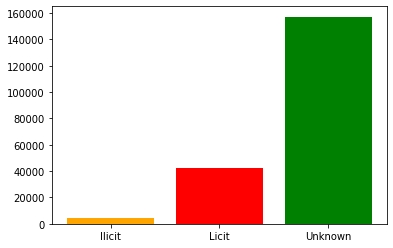

In [ ]:
txs_by_class = df_txs_features.groupby('class').count()
plt.bar(['Ilicit', 'Licit', 'Unknown'], txs_by_class['txId'].values, color=['orange', 'r', 'g'] )

Number of transactions by time step:

Text(0.5, 1.0, 'Number of transactions by time step')

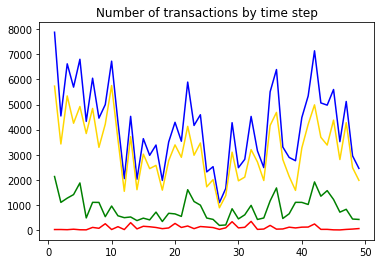

In [ ]:
total_txs = df_txs_features.groupby('Time step').count()
illicit_txs = df_txs_features[df_txs_features['class']==1].groupby('Time step').count()
licit_txs = df_txs_features[df_txs_features['class']==2].groupby('Time step').count()
unknown_txs = df_txs_features[df_txs_features['class']==3].groupby('Time step').count()

plt.title('Number of transactions by time step')
plt.plot(total_txs['txId'], color='blue')
plt.plot(illicit_txs['txId'], color='red')
plt.plot(licit_txs['txId'], color='green')
plt.plot(unknown_txs['txId'], color='gold')

Distribution of the number of transactions by time step:

**Training Set**: Time steps 1 to 34

**Testing Set**: Time steps 35 to 49

In [ ]:
grouped_class = df_txs_features[['Time step','class']].groupby(['Time step','class']).size().to_frame().reset_index()

timesteps = list(range(1,50))

fig = go.Figure(data = [
    go.Bar(name="Unknown (unlabelled)",x=timesteps,y=grouped_class[grouped_class['class'] == 3][0],marker = dict(color = 'orange', line = dict(color = 'orange',width=1))),
    go.Bar(name="Licit (non-fraud)",x=timesteps,y=grouped_class[grouped_class['class'] == 2][0],marker = dict(color = 'green', line = dict(color = 'green',width=1))),
    go.Bar(name="Illicit (fraud)",x=timesteps,y=grouped_class[grouped_class['class'] == 1][0],marker = dict(color = 'red', line = dict(color = 'red',width=1)))
])

fig.update_layout(barmode='stack')

Numerical distribution of the number of transactions of each class by time step:
<br>

<br>

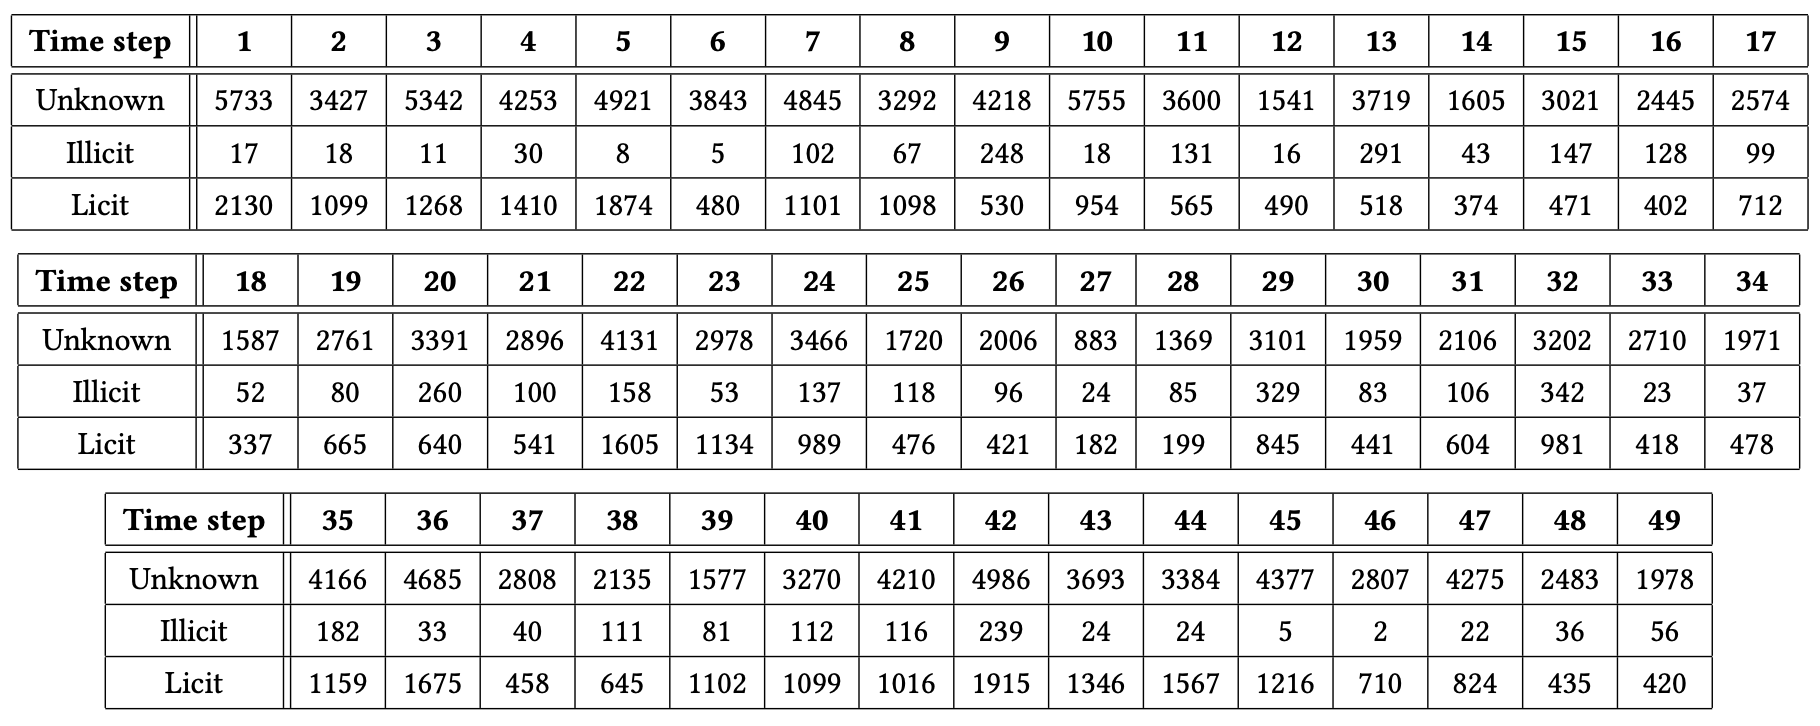

In [ ]:
unknown_count = grouped_class[grouped_class['class'] == 3]
illicit_count = grouped_class[grouped_class['class'] == 1]
licit_count = grouped_class[grouped_class['class'] == 2]

frames = [unknown_count, illicit_count, licit_count]
df_count_distribution = pd.concat(frames)
df_count_distribution.rename(columns={0: 'counts'}).sort_values('Time step')

,Time step,class,counts
2,1,3,5733
0,1,1,17
1,1,2,2130
5,2,3,3427
3,2,1,18
...,...,...,...
143,48,3,2483
141,48,1,36
144,49,1,56
146,49,3,1978


Feature analysis, some features show good correlation (Local_feature_53, Local_feature_55, Aggregate_feature_70, Aggregate_feature_39) while some features show bad correlation (Local_feature_70, Local_feature_15, Aggregate_feature_41, Aggregate_feature_42):


Features showing good correlation for classification and explainability : 



<Figure size 864x576 with 0 Axes>

Text(0.5, 1.0, 'Local_feature_53')

<Figure size 864x576 with 0 Axes>

Text(0.5, 1.0, 'Local_feature_55')

<Figure size 864x576 with 0 Axes>

Text(0.5, 1.0, 'Aggregate_feature_70')

<Figure size 864x576 with 0 Axes>

Text(0.5, 1.0, 'Aggregate_feature_39')

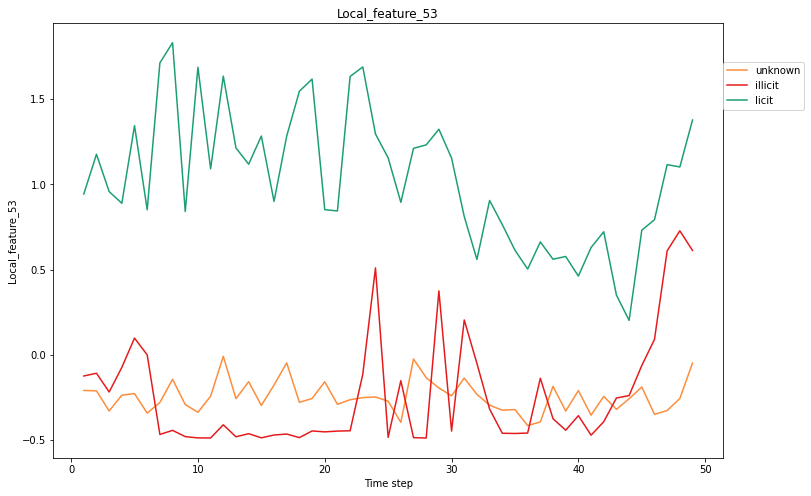

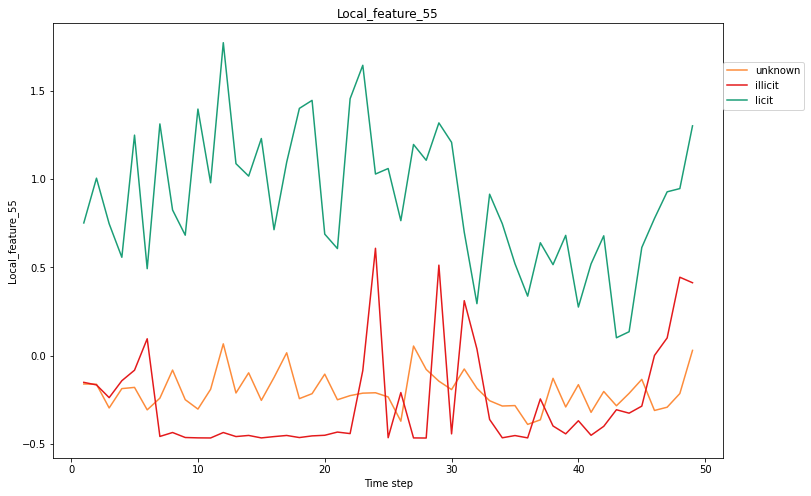

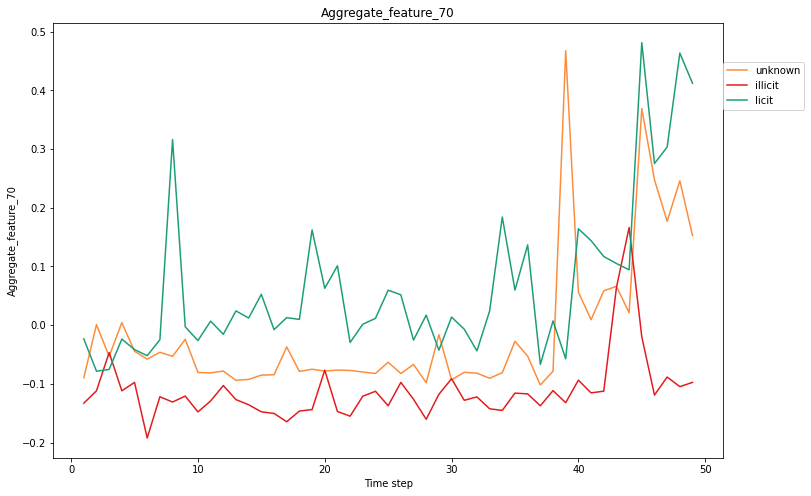

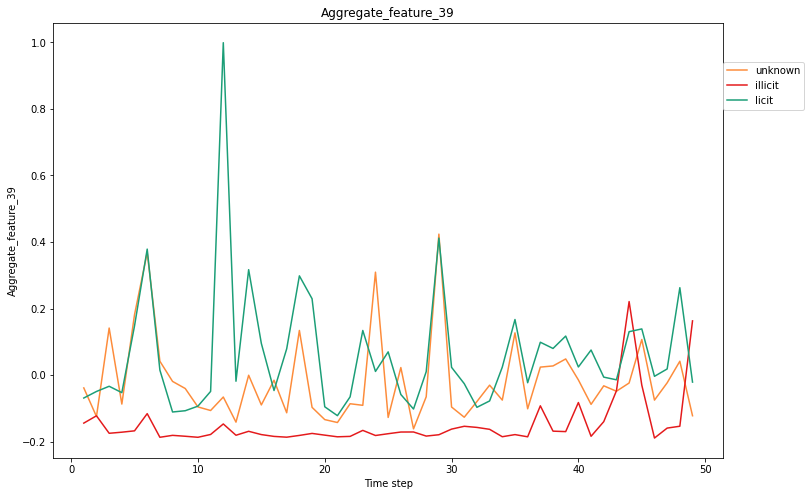

In [ ]:
print("\nFeatures showing good correlation for classification and explainability : \n")

good_correlation_features = ['Local_feature_53', 'Local_feature_55', 'Aggregate_feature_70', 'Aggregate_feature_39']

for feat in good_correlation_features:
  plt.figure(figsize=(12, 8))
  grouped = df_txs_features.groupby(['Time step', 'class'])[feat].mean().reset_index()
  grouped.loc[grouped['class'] == 1, 'class'] = 'illicit'
  grouped.loc[grouped['class'] == 2, 'class'] = 'licit'
  grouped.loc[grouped['class'] == 3, 'class'] = 'unknown'
  sns.lineplot(x='Time step', y=feat, hue='class', data=grouped[grouped['class']=='unknown'], palette='Oranges');
  sns.lineplot(x='Time step', y=feat, hue='class', data=grouped[grouped['class']=='illicit'], palette='Set1');
  sns.lineplot(x='Time step', y=feat, hue='class', data=grouped[grouped['class']=='licit'], palette='Dark2');
  plt.legend(loc=(1.0, 0.8));
  plt.title(feat);


Features showing bad correlation for classification and explainability : 



<Figure size 864x576 with 0 Axes>

Text(0.5, 1.0, 'Local_feature_70')

<Figure size 864x576 with 0 Axes>

Text(0.5, 1.0, 'Local_feature_15')

<Figure size 864x576 with 0 Axes>

Text(0.5, 1.0, 'Aggregate_feature_41')

<Figure size 864x576 with 0 Axes>

Text(0.5, 1.0, 'Aggregate_feature_42')

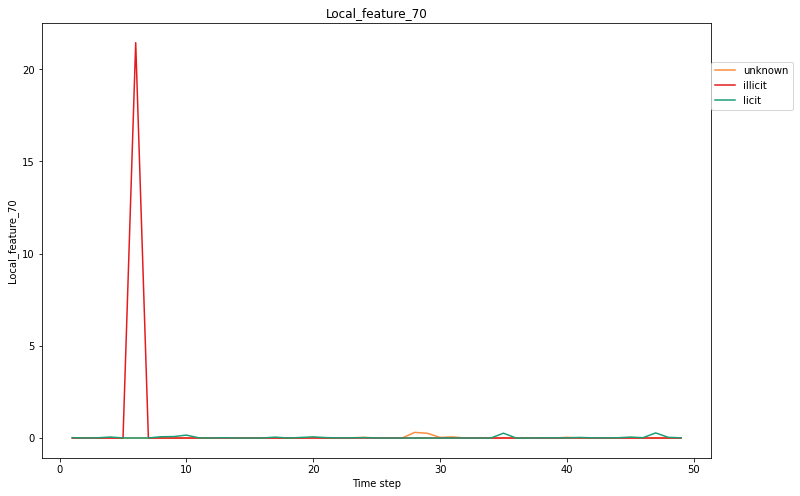

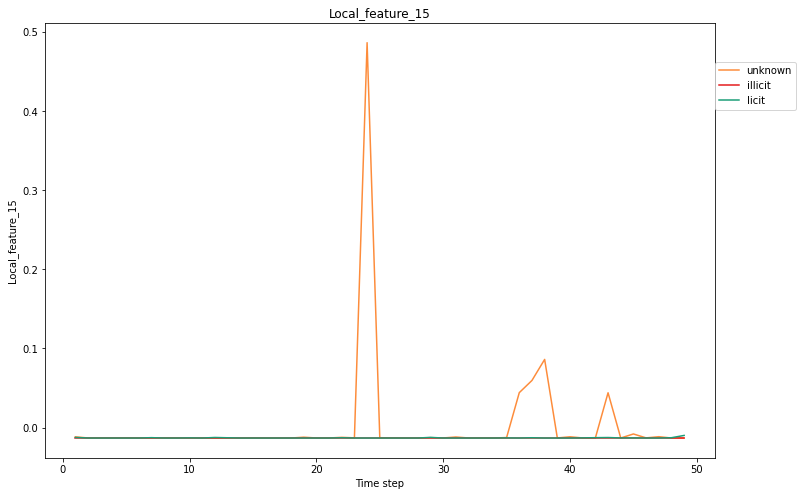

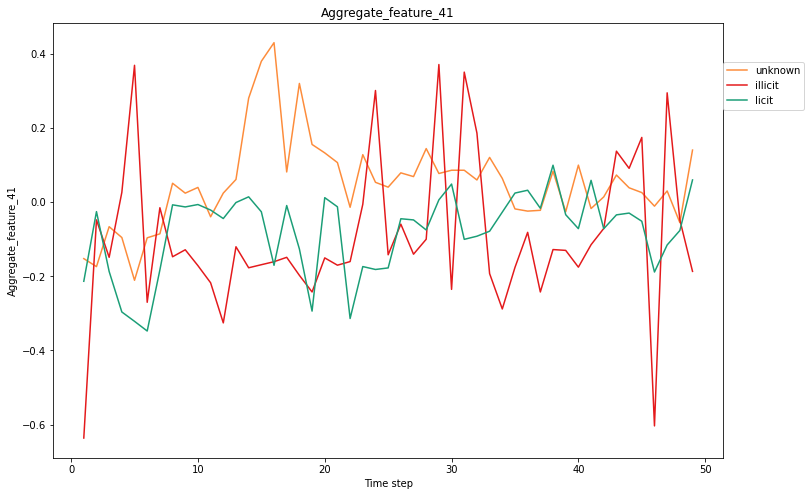

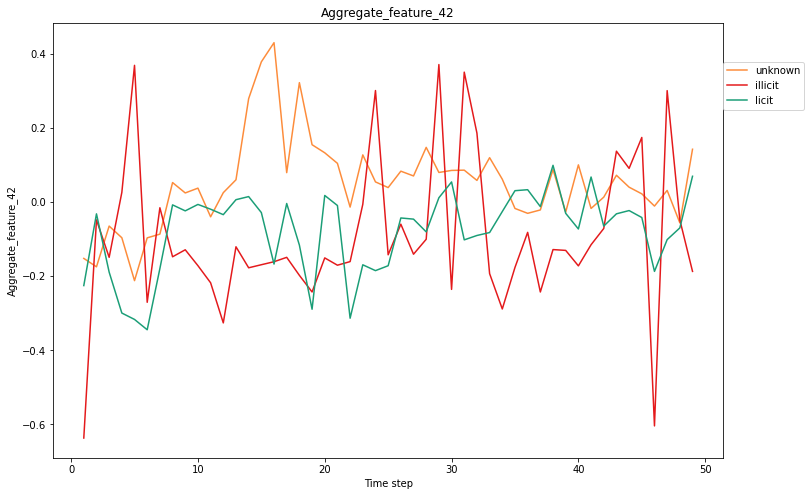

In [ ]:
print("\nFeatures showing bad correlation for classification and explainability : \n")

bad_correlation_features = ['Local_feature_70', 'Local_feature_15', 'Aggregate_feature_41', 'Aggregate_feature_42']

for feat in bad_correlation_features:
  plt.figure(figsize=(12, 8))
  grouped = df_txs_features.groupby(['Time step', 'class'])[feat].mean().reset_index()
  grouped.loc[grouped['class'] == 1, 'class'] = 'illicit'
  grouped.loc[grouped['class'] == 2, 'class'] = 'licit'
  grouped.loc[grouped['class'] == 3, 'class'] = 'unknown'
  sns.lineplot(x='Time step', y=feat, hue='class', data=grouped[grouped['class']=='unknown'], palette='Oranges');
  sns.lineplot(x='Time step', y=feat, hue='class', data=grouped[grouped['class']=='illicit'], palette='Set1');
  sns.lineplot(x='Time step', y=feat, hue='class', data=grouped[grouped['class']=='licit'], palette='Dark2');
  plt.legend(loc=(1.0, 0.8));
  plt.title(feat);

# **Acknowledgements**


---
---


Released by: Youssef Elmougy, Ling Liu



School of Computer Science, Georgia Institute of Technology

Contact: yelmougy3@gatech.edu


---

Github Repository: [https://www.github.com/git-disl/EllipticPlusPlus](https://www.github.com/git-disl/EllipticPlusPlus)


If you use our dataset in your work, please cite our paper:





>> Youssef Elmougy and Ling Liu. 2023. Demystifying Fraudulent Transactions and Illicit Nodes in the Bitcoin Network for Financial Forensics.

---

